In [1]:
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as sts
import scipy. integrate as intr
import seaborn
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pprint import pprint
max_line_width=np.inf
from scipy import linalg 

# 6.1 Differentiation

## 6.1.1

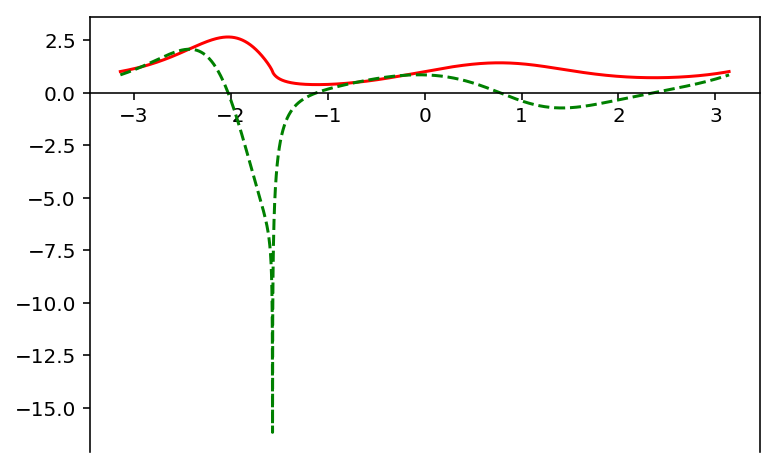

In [2]:
x = sy.symbols('x')
expr = (sy.sin(x)+1)**sy.sin(sy.cos(x)) 
f = lambdify(x,expr)
m= sy.diff(expr,x)
Df= lambdify(x,m)
xval = np.linspace(-np.pi, np.pi,10000)
%config InlineBackend.figure_format = 'retina'
ax = plt.gca()
ax.plot(xval,f(xval),'r')
ax.plot(xval,Df(xval),'g--')
ax.spines["bottom"].set_position("zero")

## 6.1.2

(array([0.84154847, 0.84252261, 0.84349753, ..., 0.83960247, 0.84057508,
        0.84154847]),
 array([0.84147098, 0.84244507, 0.84341992, ..., 0.8395251 , 0.84049766,
        0.84147098]),
 array([0.84139351, 0.84236754, 0.84334233, ..., 0.83944775, 0.84042025,
        0.84139351]),
 array([0.84147098, 0.84244507, 0.84341992, ..., 0.8395251 , 0.84049766,
        0.84147098]),
 array([0.84147099, 0.84244508, 0.84341993, ..., 0.83952511, 0.84049767,
        0.84147099]),
 array([0.84147098, 0.84244507, 0.84341993, ..., 0.83952511, 0.84049766,
        0.84147098]))

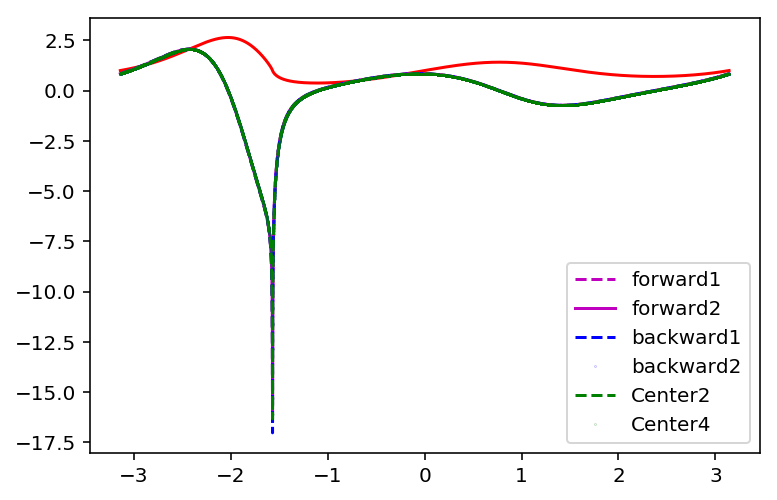

In [3]:
def dq(func,xval,h):
    D1_for = (func(xval+h)-  func(xval))/h
    D2_for = ((2*h)**-1)*(-3*func(xval) +  4*func(xval+h)-  func(xval+ 2*h))
    D1_bac = (func(xval)-  func(xval-h))/h
    D2_bac =  ((2*h)**-1)*(3*func(xval) -  4*func(xval-h) + func(xval- 2*h))
    D1_cen = 0.5*(D1_for+D1_bac)
    D2_cen =  ((12*h)**-1)*(func(xval-2*h) -  8*func(xval-h) + 8*func(xval+h) - func(xval+2*h))
    return D1_for,D2_for, D1_bac,D2_bac,D1_cen,D2_cen

def f(x):
    return (np.sin(x)+1)**np.sin(np.cos(x)) 
xc = np.linspace(-np.pi, np.pi,10000)
%config InlineBackend.figure_format = 'retina'
plt.plot(xc,f(xc),'r')
plt.plot(xc, dq(f,xc,.0001)[0],'m--', label = "forward1", markersize = 0.2)
plt.plot(xc, dq(f,xc,.0001)[1],'m-', label = "forward2", markersize = 0.2)
plt.plot(xc, dq(f,xc,.0001)[2],'b--', label = "backward1", markersize = 0.2)
plt.plot(xc, dq(f,xc,.0001)[3],'b.', label = "backward2", markersize = 0.2)
plt.plot(xc, dq(f,xc,.0001)[4],'g--', label = "Center2", markersize = 0.2)
plt.plot(xc, dq(f,xc,.0001)[5],'g.', label = "Center4", markersize = 0.2)
plt.legend()

mn = dq(f,xc,.0001)
mn

## 6.1.3

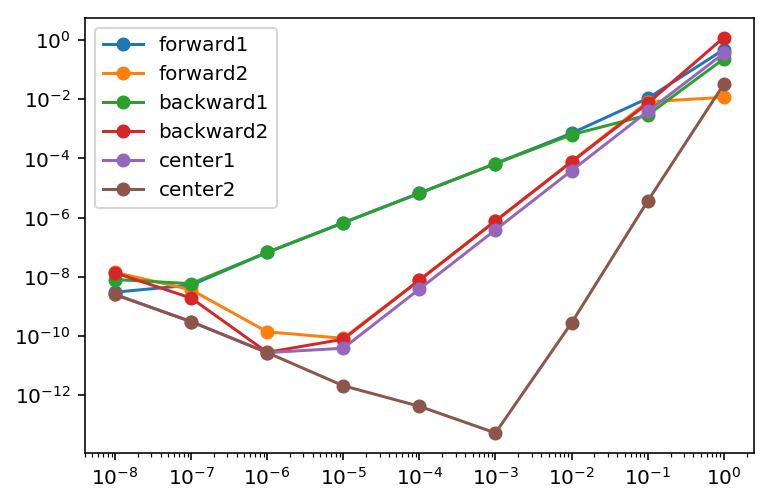

In [4]:
def dq(func,xval,h):
    D1_for = (func(xval+h)-  func(xval))/h
    D2_for = ((2*h)**-1)*(-3*func(xval) +  4*func(xval+h)-  func(xval+ 2*h))
    D1_bac = (func(xval)-  func(xval-h))/h
    D2_bac =  ((2*h)**-1)*(3*func(xval) -  4*func(xval-h) + func(xval- 2*h))
    D1_cen = 0.5*(D1_for+D1_bac)
    D2_cen =  ((12*h)**-1)*(func(xval-2*h) -  8*func(xval-h) + 8*func(xval+h) - func(xval+2*h))
    return D1_for,D2_for, D1_bac,D2_bac,D1_cen,D2_cen

def f(x):
    return (np.sin(x)+1)**np.sin(np.cos(x)) 
xc = np.linspace(-np.pi, np.pi,10000)

def check_error(x_0):
    x = sy.symbols('x')
    expr = (sy.sin(x)+1)**sy.sin(sy.cos(x)) 
    m= sy.diff(expr,x)
    Df= lambdify(x,m)
    hvals = np.logspace(-8,0,9)
    Ds = np.zeros((len(hvals)))
    names = np.array(["forward1","forward2","backward1","backward2", "center1","center2"])
    for j in np.arange(0,6):
        for i in range(len(hvals)):
            vb = dq(f,x_0,hvals[i])[j]
            Ds[i] = np.abs(Df(x_0) -vb)
        %config InlineBackend.figure_format = 'retina'
        plt.loglog(hvals,Ds, '-o',label = names[j])
        plt.legend()

check_error(0)

## Problem 6.1.4

In [5]:
plane_data = np.load("plane.npy")
time = plane_data[:,0]
alpha = plane_data[:,1]
beta = plane_data[:,2]
ralpha = np.deg2rad(alpha)
rbeta = np.deg2rad(beta)
d =500
x = d*np.tan(rbeta)/(np.tan(rbeta)- np.tan(ralpha))
y = d*np.tan(rbeta)*np.tan(ralpha)/(np.tan(rbeta)- np.tan(ralpha))
s = np.zeros_like(time)

# for t =8
s[0] =( (x[1]-x[0])**2 + (y[1]-y[0])**2 )**0.5

for i in np.arange(1,len(time)-1):
    s[i] = 0.5*( (x[i+1]-x[i-1])**2 + (y[i+1]-y[i-1])**2 )**0.5
# for t = 14
s[-1] =  ( (x[-1]-x[-2])**2 + (y[-1]-y[-2])**2 )**0.5

print("Speed in metre/second: ",np.round(s,3))

Speed in metre/second:  [46.424 47.001 48.999 50.099 48.29  51.565 53.923 51.515]


## Problem 6.1.5

In [6]:
def jacobian(func,x_0,h):
    m =  func(x_0).shape[0]
    n= len(x_0)
    basis =  np.eye(n)
    jac = np.zeros((m,n))
    for j in range(n):
        jac[:,j] = (2*h)**-1*(func(x_0+ h*basis[:,j])-func(x_0- h*basis[:,j]))
    return jac

f = lambda x:np.array([x[0]**2,x[0]**3- x[1]])
jacobian(f,np.array([5,2]),.00001)

array([[10.,  0.],
       [75., -1.]])

## Problem 6.1.6

C:\Anaconda\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


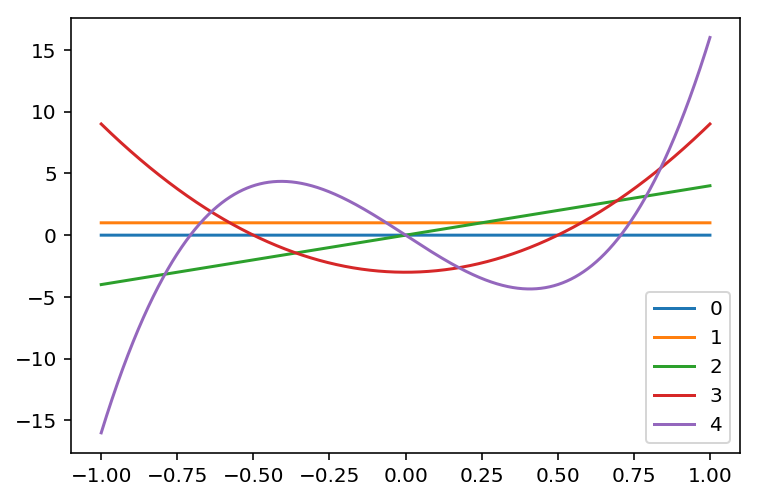

In [7]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

def cheby(x,n):
    if n ==0:
        return  anp.ones_like(x)
    elif n==1:
        return x
    else:
        return 2*x*cheby(x,n-1)- cheby(x,n-2)
        

# cheby(np.array([1,2,3]),4)
dcheby = elementwise_grad(cheby)
x = anp.linspace(-1,1,10000)
n =5
sdcheby = anp.zeros((n,len(x)))
for k in anp.arange(0,n):
    sdcheby[k,:] =  dcheby(x,k)
    %config InlineBackend.figure_format = 'retina'
    plt.plot(x, sdcheby[k,:], label = k)
    plt.legend()    

## 6.1.7 - Still needs to be corrected

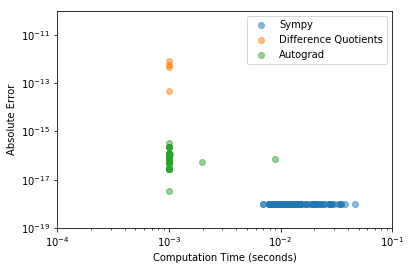

In [2]:
def symdf(x_0):
        x = sy.symbols('x')
        expr = (sy.sin(x)+1)**sy.sin(sy.cos(x)) 
        f = lambdify(x,expr)
        m= sy.diff(expr,x)
        Df= lambdify(x,m)
        return Df(x_0)
    
def d_4(func,xval,h):
    return  ((12*h)**-1)*(func(xval-2*h) -  8*func(xval-h) + 8*func(xval+h) - func(xval+2*h))

def f(x):
    return (np.sin(x)+1)**np.sin(np.cos(x)) 

def autodf(x_1):
    z = lambda x :  (anp.sin(x)+1)**anp.sin(anp.cos(x))
    dfx =  grad(z)
    val = dfx(x_1)
    return val

def expe(N):
    
    com_time = np.zeros((3,N))
    abs_error = np.zeros((3,N))
    for j in np.arange(N):
        val = np.random.random()
        # For Sympy 
        start_1 = time.time()
        sydfval = symdf(val)
        end_1 =  time.time()
        com_time[0,j] = end_1 -start_1
        abs_error[0,:] = 1e-18*np.ones(N)
       
    # For Difference Quotient
        start_2 = time.time()
        abs_error[1,j] = np.abs(sydfval - d_4(f,val,.001))
        end_2 =  time.time()
        com_time[1,j] = end_2 -start_2
        
        # For Autograd
        start_3 = time.time()
        abs_error[2,j] = anp.abs(sydfval -  autodf(val))
        end_3 =  time.time()
        com_time[2,j] = end_3 -start_3
        

    plt.scatter(com_time[0,:],abs_error[0,:],alpha =0.5, label = "Sympy")
    plt.scatter(com_time[1,:],abs_error[1,:], alpha =0.5,label = "Difference Quotients")
    plt.scatter(com_time[2,:],abs_error[2,:],alpha =0.5, label = "Autograd")
    plt.xlim([1e-4, 1e-1])
    plt.ylim([1e-19, 1e-10])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Computation Time (seconds)")
    plt.ylabel("Absolute Error")
    plt.legend()
    plt.show()
    
        
        
expe(200)

# 6.2 Integration

## 6.2.1

In [ ]:
g = lambda x:  0.1*x**4-1.5*x**3+ 0.53*x**2 +2*x +1

def integrate(f,a,b,N, method= {'midpoint','trapezoid','simpsons'}):
    if method == 'midpoint':
        return ((b-a)/N)*np.sum(g(np.linspace(a,b,N)))
    if method == 'trapezoid':
        i = np.arange(1,N)
        x = a + i*(b-a)/N
        return ((b-a)/(N))*(g(a) + np.sum(g(x))+ g(b))
    if method == 'trapezoid':
        i = np.arange(1,N)
        x = a + i*(b-a)/N
        return ((b-a)/(2*N))*(g(a) + 2*np.sum(g(x))+ g(b))
    if method == 'simpsons':
        i1 = np.arange(1,2*N,2)
        i2 =  np.arange(2,2*N,2)
        x1 = a + i1*(b-a)/(2*N)
        x2 = a + i2*(b-a)/(2*N)
        return ((b-a)/(3*(2*N+1)))*(g(a) + 4*np.sum(g(x1))+2*np.sum(g(x2)) +g(b))
    
integrate(g,-10,10,1e5,method = 'midpoint')
integrate(g,-10,10,1e5,method = 'trapezoid')
integrate(g,-10,10,1e5,method = 'simpsons')

## 6.2.2

In [ ]:
def discrete_normal(μ,σ,N,k):
    Z = np.linspace(μ- σ*k,μ+ σ*k,N)
    ω = np.zeros(N)
    ω[0]=  sts.norm.cdf(0.5*(Z[0]+Z[1]),loc = μ, scale = σ)
    ω[-1]=  1- sts.norm.cdf(0.5*(Z[-2]+Z[-1]),loc = μ,scale = σ)
    for j in np.arange(1,N-1):
        ω[j] =  sts.norm.cdf(0.5*(Z[j]+Z[j+1]),loc = μ, scale = σ)-sts.norm.cdf(0.5*(Z[j]+Z[j-1]),loc = μ, scale = σ)
    return Z, ω

nodes, weights = discrete_normal(0,1,11,4)
print(nodes,weights)    

## 6.2.3

In [ ]:
def discrete_lognormal(μ,σ,N,k):
    Z = np.linspace(μ- σ*k,μ+ σ*k,N)
    Z_log = np.exp(Z)
    ω_log =  discrete_normal(μ,σ,N,k)[1]
    return Z_log, ω_log


nodes_log, weights_log = discrete_lognormal(0,1,11,4)
print(nodes_log,weights_log)    

## 6.2.4

In [ ]:
μ = 10.5
σ = 0.8
exact_mean_income= np.exp(μ+σ**2*0.5)
exact_mean_income
est_income = np.sum(discrete_lognormal(μ,σ,100,10)[0]*discrete_lognormal(μ,σ,100,10)[1])
est_income

## 6.2.5 & 6.2.6

In [ ]:
import scipy.optimize as opt
g = lambda x:  0.1*x**4-1.5*x**3+ 0.53*x**2 +2*x +1

def get_opteq(params,args):
    ω = params[:3] 
    x =  params[3:]
    a,b = args
    equations = np.empty(len(params))
    for i in range(1, len(params)+1):
        equations[i-1] = ((b**i - a**i) / i) - ω @ x**(i-1)
    return equations

eqargs = np.array([-10,10])
eqparams =  np.ones(6)
params = opt.root(get_opteq, x0=eqparams, args=eqargs).x

weights= params[:3]
nodes =  params[3:]
print(weights, nodes)

# value from the custom function
gauss_int =  np.sum(weights * g(nodes))
print(gauss_int)

# value from the inbuilt function
intg_inbuilt = intr.quad(g,-10,10)




## 6.2.7

In [ ]:
f = lambda x,y: 1 if x**2 + y**2<=1 else 0
def monte_carlo(g,Ω,N):
    sum = 0
    for j in range(N):
        x = np.random.uniform(Ω[0,0],Ω[0,1],1)
        y = np.random.uniform(Ω[1,0],Ω[1,1],1)
        sum += f(x,y)
    area = (Ω[0,1]-Ω[0,0])*(Ω[1,1]-Ω[1,0])
    π = (area/N)*sum
    return π
        
        
domain = np.array([-1,1,-1,1]).reshape(2,2)
# monte_carlo(f,domain,10000)

def find_N(g,Ω,N):
    maxiter = 1e5
    error = 100
    iter_1 = 0
    while  iter_1 <maxiter:
        x = str(int(floor((10000*monte_carlo(g,Ω,N)))))
        if  x == '31415':
            return N
        else:
            iter_1 += 1
            N += 1
    return N,monte_carlo(g,Ω,N)

find_N(f,domain,100)

In [6]:
import math
def gen_primes(n):
    primes = np.zeros(n)
    primes[0] = 2
    for i in range(1,n):
        primes[i] = sy.nextprime(primes[i-1])
    return primes


def equi_distr(n,d,name = {'Weyl','Haber','Nied','Baker'}):
    if name == 'Weyl':    
        return np.modf(n*gen_primes(d)**0.5)[0]
    elif name == 'Haber':    
        return np.modf(0.5*n*(n+1)*gen_primes(d)**0.5)[0]
    elif name == 'Nied':  
        ar = np.arange(1, d + 1)
        x = n * (2 ** (ar / (d + 1)))
        x_floor = np.floor(x)
        xn = x - x_floor
        return xn
    elif name == 'Baker':    
        return math.modf(n*2**((np.arange(1,d+1))/n))[0]

equi_distr(20,5,name = 'Nied')

array([0.44924097, 0.198421  , 0.28427125, 0.74802104, 0.63594873])

In [ ]:
np.modf(5*gen_primes(2)**0.5)[0]

## 6.2.9

In [8]:
f = lambda x,y: 1 if x**2 + y**2<=1 else 0
def monte_carlo_quasi(g,N):
    sum = 0
    for j in range(1,N+1):
        x= equi_distr(j,2,name = 'Nied')[0]
        y = equi_distr(j,2,name = 'Nied')[1]
        sum += g(x,y)
    π = (4/N)*sum
    return π
monte_carlo_quasi(f,200)

3.12

# 6.3 - Simplex Method

## 6.3.1

In [253]:
class simplex_algo:
    def __init__(self, c, A, b):
        self.c = c
        self.A = A
        self.b = b
        self.n = len(c)
        if np.any(self.A@np.zeros((self.n, 1))>self.b):
            raise ValueError('Not feasible')
    
        self.m,self.n = self.A.shape
        ind =  np.concatenate((np.arange(self.n,self.n+self.m),np.arange(self.n)))
        self.index =  ind
        self.T = self.x_tableau()
        self.basic = self.index[:self.m]
        self.nonbasic = self.index[self.m:]
        
    def x_tableau(self):
        A_bar = np.hstack((self.A,np.identity(self.m)))
        c_bar =  -1*np.hstack((self.c,np.zeros(self.m)))
        T_1 =  np.hstack((np.zeros(1),c_bar,np.ones(1)))
        T_2 = np.column_stack((self.b,A_bar,np.zeros((self.m,1))))
        T = np.vstack((T_1,T_2))
        return T
    
    def pivot(self):
        x =  self.T[0,:]
        col = np.argmin(np.where(x<0))+1
        if np.all(self.T[1:,col])<0:
            raise ValueError('Problem is unbounded')
        row = np.argmin(self.T[1:,0]/self.T[1:,col])+1
        return row,col
    
    def pivot_oper(self):
        row,col = self.pivot()
        ind = self.index
        ind[row-1],ind[self.m+col-1]=ind[self.m+col-1], ind[row-1]
        self.index =  ind
        self.T[row,:] = self.T[row,:]/self.T[row,col]
        dim1, dim2  = self.T.shape
        for h in range(dim1):
            if h != row:
                self.T[h,:]=self.T[h,:]-self.T[h,col]*self.T[row,:]
    
    def solve_simplex(self):
        maxiter = 1000
        iterx = 0
        while np.any(self.T[0,:] < 0) and  iterx<maxiter:
            self.pivot_oper()
            iterx += 1
        return self.T
#         basic_dict = {self.basic[i]: round(self.T[i+1, 0], 2) for i in range(self.m)}
#         nonbasic_dict = {self.nonbasic[i]: 0 for i in range(self.n)}
#         return self.T[0, 0], basic_dict, nonbasic_dict

In [275]:
c_1 = np.array([3, 2])
A_1 = np.array([[1, -1], [3, 1], [4, 3]])
b_1 = np.array([2, 5, 7])
xcv1= simplex_algo(c_1, A_1, b_1)

# xcv1.index

# m= xcv1.x_tableau()
# print(xcv1.pivot())
# print("Before",xcv1.T)
# # xcv1.pivot_oper()
pprint(xcv1.solve_simplex())


array([[ 5.  ,  0.  , -1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.33,  0.  , -1.33,  1.  , -0.33,  0.  ,  0.  ],
       [ 1.67,  1.  ,  0.33,  0.  ,  0.33,  0.  ,  0.  ],
       [ 0.33,  0.  ,  1.67,  0.  , -1.33,  1.  ,  0.  ]])


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


In [276]:
print("After", xcv1.T)

After [[ 5.    0.   -1.    0.    1.    0.    1.  ]
 [ 0.33  0.   -1.33  1.   -0.33  0.    0.  ]
 [ 1.67  1.    0.33  0.    0.33  0.    0.  ]
 [ 0.33  0.    1.67  0.   -1.33  1.    0.  ]]


# 6.4- Iterative solvers

## 6.4.1

In [20]:
def diag_dom(n, num_entries=None):
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

def jacob_solver(A,b,tol,maxiters):
    iters = 0
    error = 10
    m,n = A.shape
    inv_D =  np.diag(np.diag(A)**-1.)
    x_0 = 1e-8*np.zeros(n)
    
    while error > tol and iters < maxiters:
        x_1 = x_0 + inv_D@(b - A@x_0)
        error = linalg.norm(x_1- x_0, np.inf)
        x_0 = x_1
        iters += 1
    return x_1

A = diag_dom(3)
b = np.random.random(3)
tol = 1e-6
maxiters = 100

jacob_solver(A,b,tol,maxiters)
        

array([0.04447076, 0.37443424, 0.1408885 ])

In [303]:
A = np.array([[2, 0,-1],[-1,3,2],[0,1,3]])
b = np.array([3,3,-1])
jacob_solver(A,b,tol,maxiters)

array([ 1.,  2., -1.])

## 6.4.2

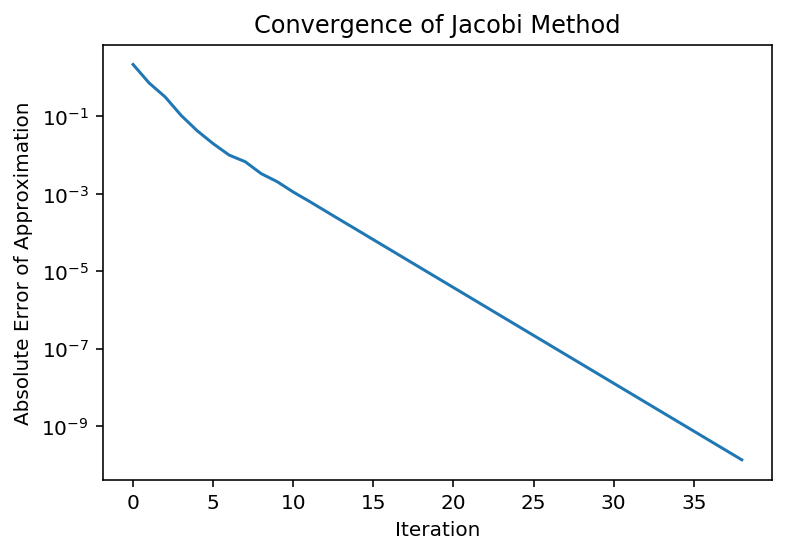

(array([ 1.,  2., -1.]), [<matplotlib.lines.Line2D at 0x13a722d51d0>])

In [324]:
def jacob_solver(A,b,tol,maxiters, plot = False):
    iters = 0
    error = 10
    m,n = A.shape
    inv_D =  np.diag(np.diag(A)**-1.)
    x_0 = 1e-8*np.zeros(n)
    iter_list = []
    ab_er = []
    while error > tol and iters < maxiters:
        x_1 = x_0 + inv_D@(b - A@x_0)
        error = linalg.norm(x_1- x_0, np.inf)
        ab_er.append(linalg.norm(A@x_1- b, np.inf))
        iter_list.append(iters)
        x_0 = x_1
        iters += 1
    if plot == True:
        ax = plt.gca()
        bp = ax.semilogy(iter_list,ab_er)
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.title("Convergence of Jacobi Method")
        plt.show()
    return x_1,bp


A = np.array([[2, 0,-1],[-1,3,2],[0,1,3]])
b = np.array([3,3,-1])
jacob_solver(A,b,tol,maxiters, plot = True)


array([ 0.06,  0.03,  0.05,  0.02,  0.07,  0.12,  0.02,  0.05,  0.02,  0.05,  0.05,  0.15,  0.03,  0.09,  0.12,  0.03,  0.03, -0.01, -0.02,  0.03,  0.05,  0.03,  0.05,  0.08,  0.08,  0.05,  0.09,  0.06,  0.05,  0.1 ,  0.04,  0.07, -0.01,  0.01,  0.09,  0.03,  0.03,  0.04,  0.04,  0.05,  0.03,  0.04,  0.06,  0.06,  0.07,  0.05,  0.07,  0.06,  0.05,  0.09,  0.05,  0.07,  0.07,  0.02,  0.01,  0.02,  0.06,  0.14,  0.09,  0.01,  0.02,  0.04,  0.03,  0.18,  0.05,  0.1 ,  0.02,  0.05,  0.07,  0.07,  0.06,  0.04,  0.03,  0.03,  0.01,  0.01,  0.01,  0.05,  0.04,  0.07,  0.11,  0.07,  0.06,  0.19,  0.03,  0.02,  0.04,  0.07,  0.04,  0.05,  0.02,  0.02,  0.01,  0.01,  0.03,  0.02,  0.05,  0.04,  0.07,  0.03])

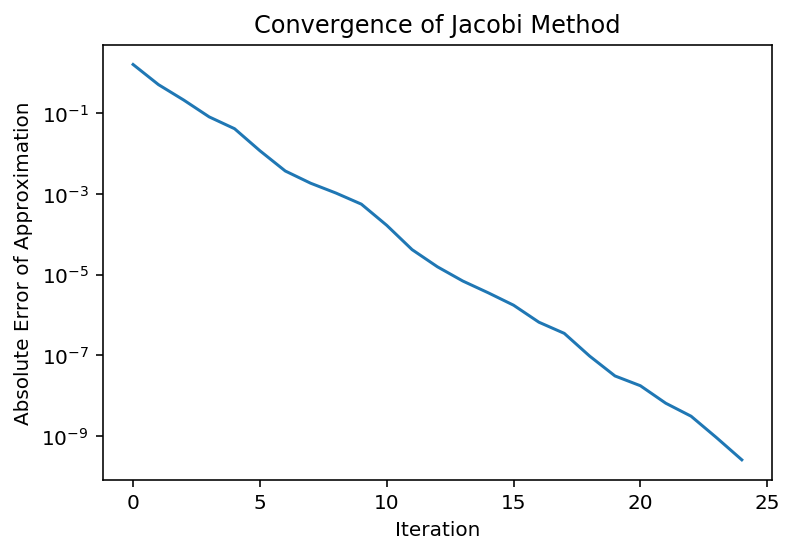

In [316]:
A = diag_dom(100)
b = np.random.random(100)
tol = 1e-10
maxiters = 50

jacob_solver(A,b,tol,maxiters, plot = True)

## 6.4.3 

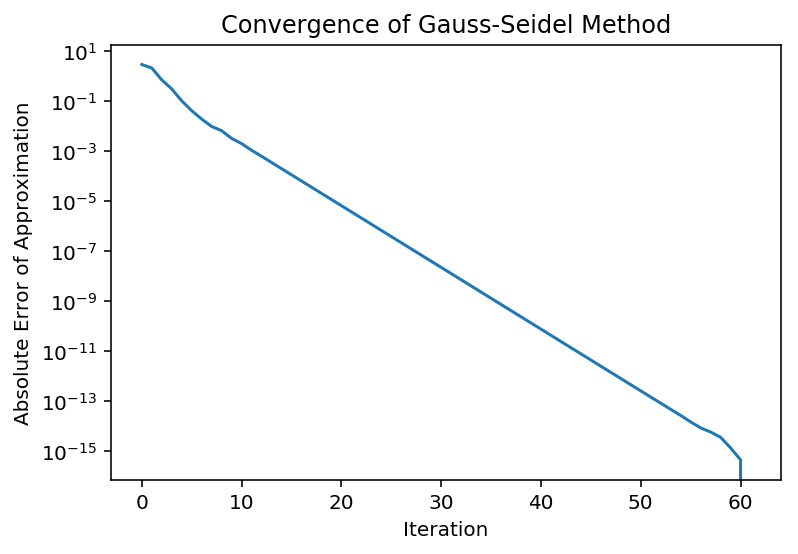

(array([ 1.,  2., -1.]), [<matplotlib.lines.Line2D at 0x13a309e9048>])

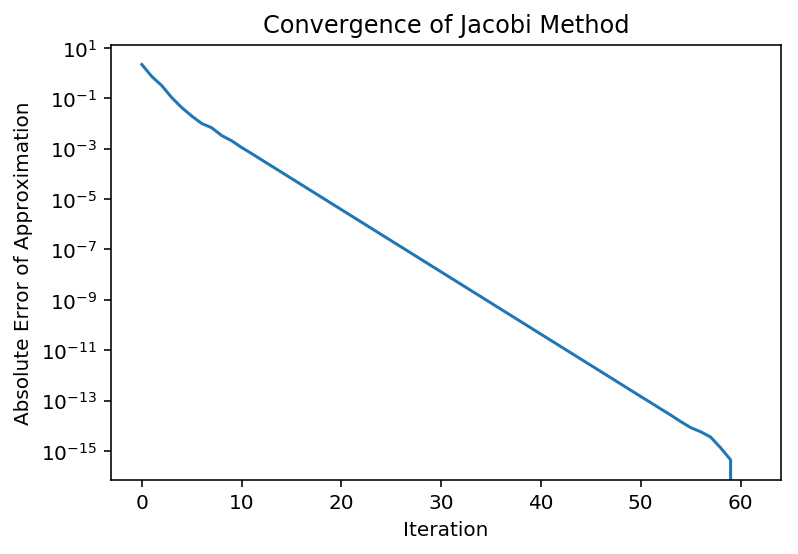

(array([ 1.,  2., -1.]), [<matplotlib.lines.Line2D at 0x13a012d6358>])

In [377]:
def GS_solver(A,b,tol,maxiters, plot = False):
    iters = 0
    error = 10
    m,n = A.shape
    x_0 = 1e-8*np.zeros(n)
    iter_list = []
    ab_er = []
    while error > tol and iters < maxiters:
        x_0_copy = x_0.copy()
        x_1 = np.array([x_0[i] + (1 / A[i, i]) * (b[i] - A[i] @ x_0) for i in range(len(x_0))]) 
        error = linalg.norm(x_1- x_0_copy, np.inf)
        iter_list.append(iters)
        x_0 = x_1
        ab_er.append(linalg.norm(A@x_0_copy- b, np.inf))
        iters += 1
    if plot == True:
        ax = plt.gca()
        bp = plt.semilogy(iter_list,ab_er)
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.title("Convergence of Gauss-Seidel Method")
        plt.show()
    return x_1,bp

A = np.array([[2, 0,-1],[-1,3,2],[0,1,3]])
b = np.array([3,3,-1])
GS_solver(A,b,tol,maxiters, plot = True)
jacob_solver(A,b,tol,maxiters, plot = True)

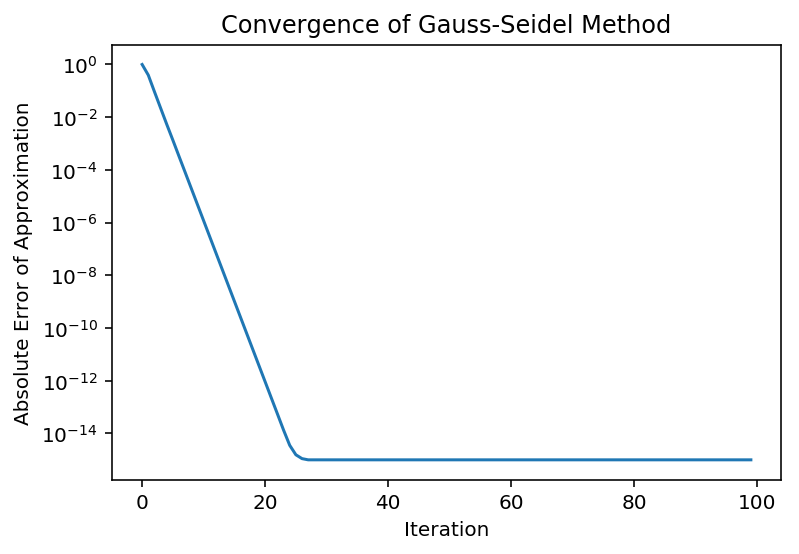

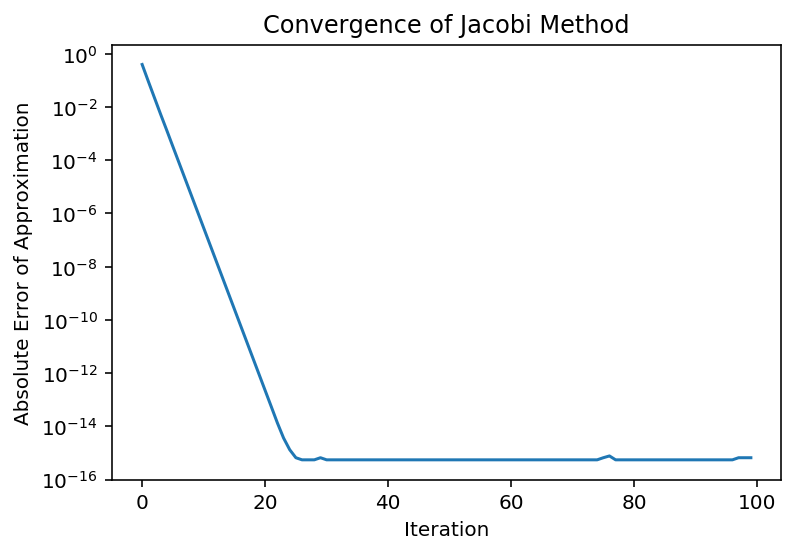

In [378]:
A = diag_dom(100)
b = np.random.random(100)
tol = 1e-200
maxiters = 100


GS_solver(A,b,tol,maxiters, plot = True)[1]
jacob_solver(A,b,tol,maxiters, plot = True)[1]

## 6.4.4 

In [16]:
def GS_solver(A,b,tol,maxiters):
    iters = 0
    error = 10
    m,n = A.shape
    x_0 = np.zeros(n)
    x_1 = np.zeros_like(x_0)
    while error > tol and iters < maxiters:
        x_0_copy = x_0.copy()
        for i in range(len(x_0)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x_0[A.indices[rowstart:rowend]]
            x_1[i] = x_0[i] + (1 / A[i, i]) * (b[i] - Aix)
        error = linalg.norm(x_1- x_0_copy, np.inf)
        x_0 = x_1
        iters += 1
    return x_1

In [384]:
from scipy import sparse
A = sparse.csr_matrix(diag_dom(5000))
b = np.random.random(5000)
# print(A)
# print(b)
tol = 1e-6
maxiters = 100

x = GS_solver(A,b,tol,maxiters)
np.allclose(A @ x, b, atol=1e-5)

True

## 6.4.5. 

In [36]:
def SOR_solver(A, b,ω, tol=1e-8, maxiters = 100):
    iters = 0
    error = 10
    x_0 = np.zeros(len(b))
    x_1 = np.zeros_like(x_0)
    while error > tol and iters < maxiters:
        x_0 = x_0.copy()
        for i in range(len(x_0)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x_0[A.indices[rowstart:rowend]]
            x_1[i] = x_0[i] + (ω/A[i,i])*(b[i] - Aix)
        dist = np.linalg.norm(x_1 - x_0)
        x_0 = x_1
        iters += 1
    return x_0, iters

In [21]:
from scipy import sparse
A = diag_dom(10)
A_x = sparse.csr_matrix(A)
b = np.random.random(10)
# print(A)
# print(b)
# tol = 1e-8
# maxiters = 100
x_gs = GS_solver(A_x,b,1e-8,100)
x_SOR,iters =SOR_solver(A_x,b,1.1)
print(x_gs)
print(x_SOR)
# print(b)
# np.allclose(A @ x, b, atol=1e-5)

[ 0.03118048  0.82763498  0.26219483 -0.224649    0.16786195  0.16658201
  0.03029471  0.00250977 -0.06683161  0.51009983]
[ 0.03118048  0.82763498  0.26219483 -0.224649    0.16786195  0.16658201
  0.03029471  0.00250977 -0.06683161  0.51009983]


## 6.4.6

In [46]:
def gauss_seidal_relax_sparse(A, b, w, tol=1e-5, maxiters=5000, plot=False):
    
    errors = []
    
    err = tol + 1
    it = 1
    n = len(b)
    # Initial guess is the zero vector
    xk = np.zeros(n)
    A = A.tocsr()
    
    while err > tol and it < maxiters:
        xkp1 = np.copy(xk)
        for ii in range(n):
            # Get the indices of where the i-th row of A starts and ends if the
            # nonzero entries of A were flattened.
            rowstart = A.indptr[ii]
            rowend = A.indptr[ii+1]
            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ xk[A.indices[rowstart:rowend]]
            
            xkp1[ii] = xk[ii] + (w / A[ii,ii]) * (b[ii] - 1 * Aix)
        
        abserr = np.linalg.norm(A@xkp1 - b, np.inf)
        errors.append(abserr)
        err = np.linalg.norm(xkp1 - xk, np.inf)
        it += 1
        xk = xkp1
    
    if plot:
        fig = plt.figure(figsize=(10,7))
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Gauss Seidal')
        plt.semilogy(np.arange(1, it, 1), errors)
    
    return xk, it

In [47]:
from scipy import sparse
def solve_heat(n, w, tol=1e-8, maxiters=100, plot=False):
    
    # Construct B
    offsets = [-1,0,1]
    B = sparse.diags([1,-4,1], offsets, shape=(n,n))

    # Construct Identity Matrix
    I = sparse.diags([1], shape=(n,n))
    
    # Construct A
    rows = []
    for ii in range(n):
        row = []
        for jj in range(n):
            if jj < ii - 1:
                row.append(None)
            elif jj == ii - 1:
                row.append(I)
            elif jj == ii:
                row.append(B)
            elif jj == ii + 1:
                row.append(I)
            else:
                row.append(None)
        rows.append(row)
    
    A = sparse.bmat(rows, format='bsr')

    # Construct b
    lilb = np.zeros(n)
    lilb[0] = -100
    lilb[-1] = -100
    b = np.tile(lilb, n)
    
    u, it = gauss_seidal_relax_sparse(A, b, w, tol, maxiters, plot=False)
    
    x_domain = np.linspace(0, 1, n + 1)
    y_domain = np.linspace(0, 1, n + 1)
    X, Y = np.meshgrid(x_domain, y_domain)
    u_square = u.reshape((n,n))
    fig = plt.figure(figsize=(10,7))
    plt.pcolormesh(X, Y, u_square, cmap='coolwarm')
    plt.colorbar()
    plt.show()
    
    return u, it

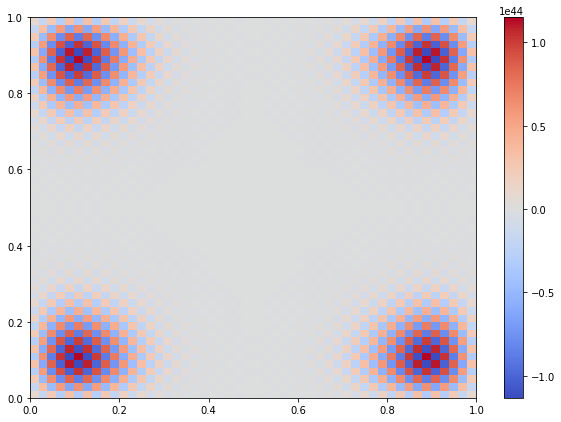

In [50]:
u, it = solve_heat(50, 2, plot=True)

## 6.4.7 

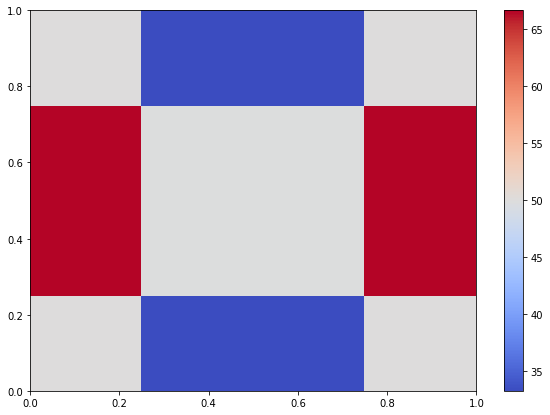

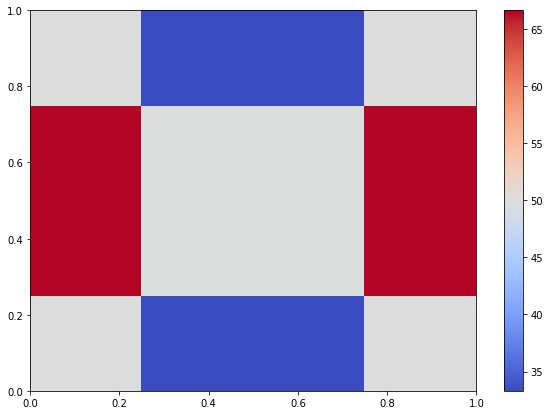

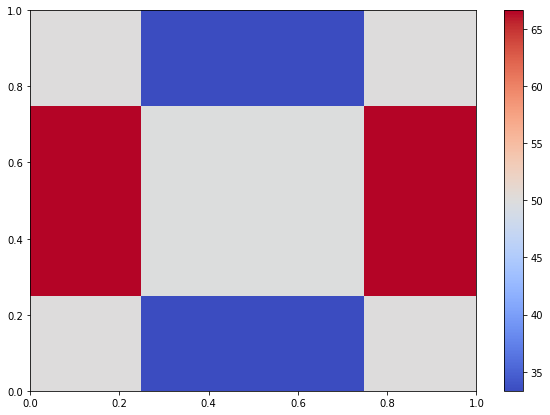

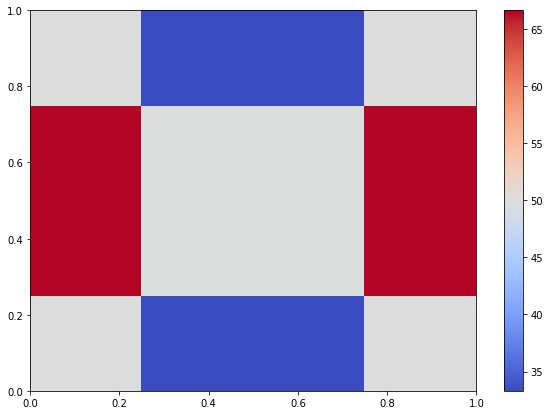

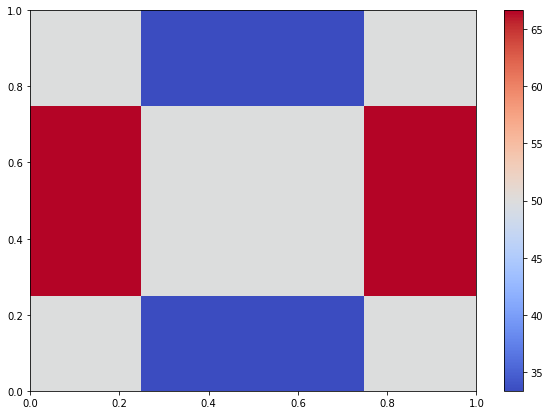

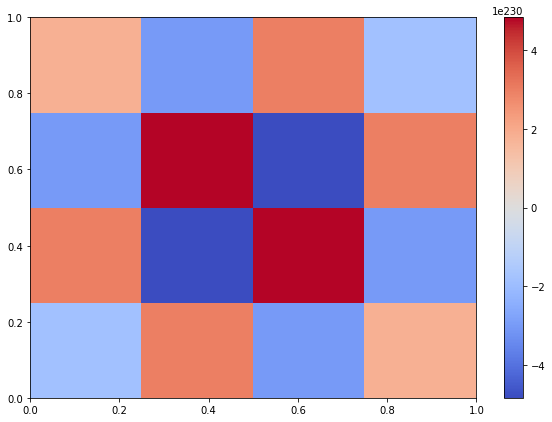

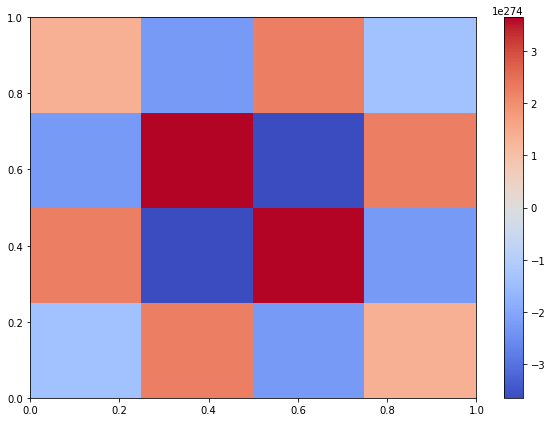

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


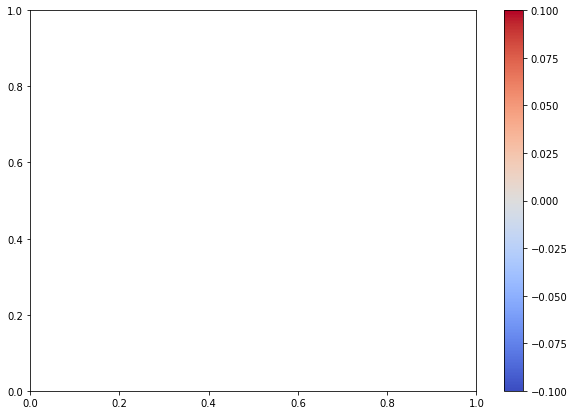

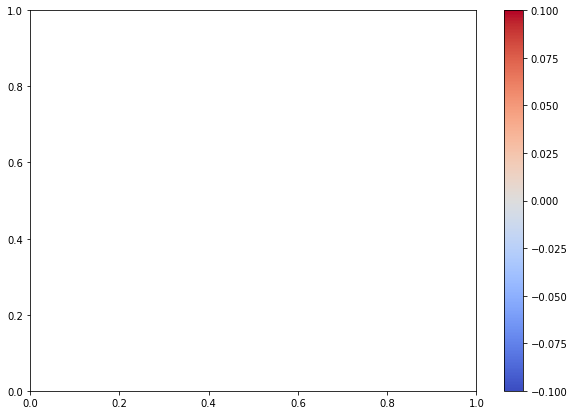

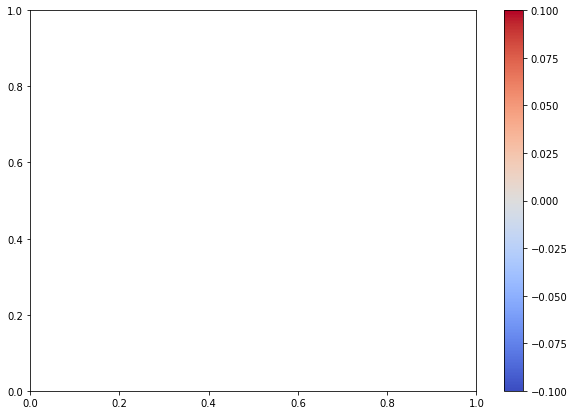

1.3166666666666667

Text(0.5,0,'$\\omega$')

Text(0,0.5,'Number of Iterations')

Text(0.5,1,'Convergence of Heat Equation (GS) over Relaxation Factor')

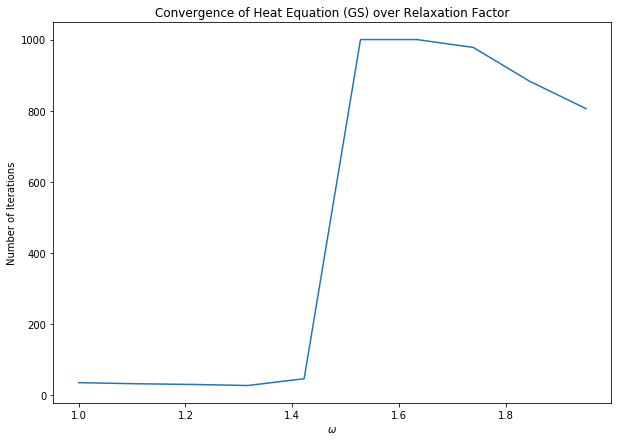

In [51]:
n = 4
weights = np.linspace(1, 1.95, 10)
its = np.zeros(len(weights))
for index, w in enumerate(weights):
    x_j, it = solve_heat(n, w, 1e-2, 1000, plot=False)
    its[index] = it
    
argmin = np.argmin(its)
weights[argmin]

fig = plt.figure(figsize=(10,7))
plt.plot(weights, its)
plt.xlabel(r'$\omega$')
plt.ylabel('Number of Iterations')
plt.title('Convergence of Heat Equation (GS) over Relaxation Factor')
plt.show()

# 6.5 - Newton's method

## 6.5.1

In [ ]:
def simple_newton1(f,x_0,df,maxiter =15,tol =1e-5):
    iter_1 =0
    error =10
    while error >tol and iter_1<maxiter:
        x_1 = x_0 - f(x_0)/df(x_0)
        error = np.abs(x_1-x_0)
        x_0 = x_1
        iter_1 += 1
    return x_1,error<= tol,iter_1

g1  = lambda x: x**4-3
dg1 =  lambda x: 4*x**3

g2  = lambda x: np.exp(x)-2
dg2 =  lambda x: np.exp(x)

simple_newton1(g1,3,dg1,20,1e-6)
simple_newton1(g2,3,dg2,20,1e-6)
        

## 6.5.2

In [ ]:
def solve_bank(N1,N2,P1,P2):
    maxiter =100
    tol = 1e-7
    iter_1 =0
    error =10
    r_0 = 0.1
    while error >tol and iter_1<maxiter:
        r_1 = r_0 - g(N1,N2,P1,P2,r_0)/dg(N1,N2,P1,P2,r_0,1e-6)
        error = np.abs(r_1-r_0)
        r_0 = r_1
        iter_1 += 1
    return r_1

g  = lambda n1,n2,p1,p2,r: p1*((1+r)**n1-1)-p2*(1-(1+r)**-n2)
dg = lambda n1,n2,p1,p2,r,h:(g(n1,n2,p1,p2,r+h)-g(n1,n2,p1,p2,r))/h

solve_bank(30,20,2000,8000)


## 6.5.3

In [ ]:
def simple_newton2(f,x_0,df,maxiter,tol,α):
    iter_1 =0
    error =10
    while error >tol and iter_1<maxiter:
        x_1 = x_0 - α*f(x_0)/df(x_0)
        error = np.abs(x_1-x_0)
        x_0 = x_1
        iter_1 += 1
    return np.array([x_1,error<= tol,iter_1])

f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
df = lambda x: 1./3 * np.power(np.abs(x), -2/3)

simple_newton2(f,.01,df,20,1e-5,1.0)
simple_newton2(f,.01,df,20,1e-5,0.4)  

## 6.5.4

In [ ]:
def opt_alpha(f,x_0,df,maxiter,tol):
    α = np.linspace(1e-5,1.000001,1000)
    iter_stop = np.zeros(len(α))
    for i in range(len(α)):
        iter_stop[i] = simple_newton2(f,x_0,df,maxiter,tol,α[i])[2]
    plt.plot(α,iter_stop,'m.', alpha =0.5)
    
opt_alpha(f,.01,df,1000,1e-20)

## 6.5.5

In [26]:
g1  = lambda x: np.array([x[0]**4 +x[1]**3 -3,x[0]**3 +x[1]**4 -3])
g2 = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
g3  = lambda x: x**4-3
# dg1 = lambda x: 1./3 * np.power(np.abs(x), -2/3)



def jacobian(func,x_vec):
    h = .0001
    m =  func(x_vec).shape[0]
    n= len(x_vec)
    basis =  np.eye(n)
    jac = np.zeros((m,n))
    for j in range(n):
        jac[:,j] = (2*h)**-1*(func(x_vec+ h*basis[:,j])-func(x_vec- h*basis[:,j]))
    return jac

jacobian(g1,np.array([1,2]))

def simple_newton4(f,x_vec,maxiter,tol,α):
    iter_1 =0
    error =10
    if np.isscalar(f):
        return simple_newton2(f,x_vec,jacobian(f,x_vec),maxiter,tol,α)
    else:
        while error >tol and iter_1<maxiter:
            x_1 = x_vec - α*linalg.solve(jacobian(f,x_vec), f(x_vec))
            error = linalg.norm(x_1-x_vec,2)
            x_vec = x_1
            iter_1 += 1
    return x_1,error<= tol,iter_1

simple_newton4(g3,np.array([1]),200,1e-6,.5)

array([[ 4.00000004, 12.00000001],
       [ 3.00000001, 32.00000008]])

(array([1.31607315]), True, 17)

## 6.5.6 

In [27]:
f = lambda x: anp.array([5*x[0]*x[1] - x[0]*(1 + x[1]), -x[0]*x[1] + (1 - x[1])*(1 + x[1])])
Df = jacobian(f,np.array([1,1]))

def find_init(f, Df, niter=100):
    # Create search domain
    x_domain = np.linspace(-0.25, 0, 100)
    y_domain = np.linspace(0, 0.25, 100)
    X, Y = np.meshgrid(x_domain, y_domain)
    xy_domain = zip(X.ravel(), Y.ravel())
    
    # See where each point in the domain converges
    for coord in xy_domain:
        try:
            min1 = simple_newton4(anp.array(coord), f, Df, alpha=1, maxiter=niter)
            min2 = simple_newton4(anp.array(coord), f, Df, alpha=0.55, maxiter=niter)
            if (np.allclose(min1, anp.array((0, 1))) or np.allclose(min1, anp.array((0, -1)))) and np.allclose(min2, anp.array((3.75, 0.25))):
                return coord
        except:
            pass

print(find_init(f, Df))

None


## 6.5.7

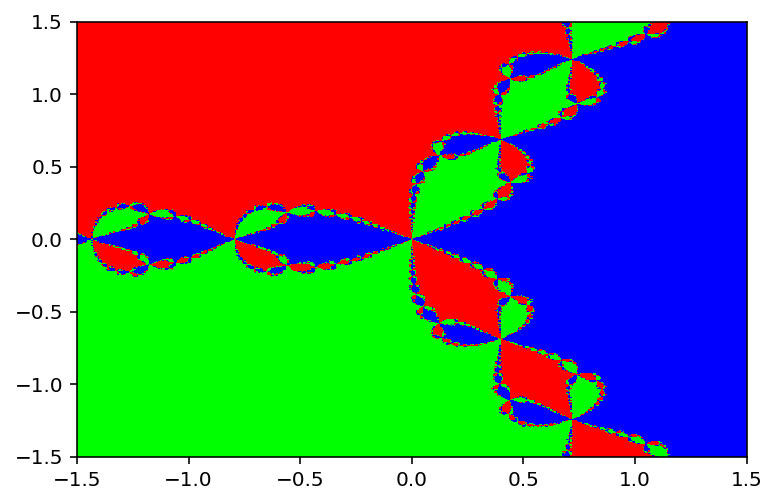

In [23]:
def simple_newton1(f,x_0,df,maxiter =15,tol =1e-5):
    iter_1 =0
    error =10
    while error >tol and iter_1<maxiter:
        x_1 = x_0 - f(x_0)/df(x_0)
        error = linalg.norm(x_1-x_0,2)
        x_0 = x_1
        iter_1 += 1
    return x_1,error<= tol,iter_1

g1  = lambda x: x**3-1
dg1 =  lambda x: 3*x**2 ## 6.5.7
g2  = lambda x: x**3-x
dg2 =  lambda x: 3*x**2 -1 ## 6.5.7
zeros1 = np.array([1 + 1j*0., -0.5+ 1j*np.sqrt(3),-0.5- 1j*np.sqrt(3)])
zeros2 = np.array([0 + 1j*0., -1+ 1j*0.,1+1j*0.])


def plot_newton_frac(F,Df,zeros,bounds,res,iters):
    rmin,rmax,imin,imax = bounds[0],bounds[1],bounds[2],bounds[3]
    x = np.linspace(rmin,rmax,res)
    y = np.linspace(imin,imax,res)
    z_real,z_im = np.meshgrid(x,y)
    z_0 = z_real + 1j*z_im
    for i in range(iters):
        z_k =  z_0 - F(z_0)/Df(z_0)
        z_0 = z_k
    Y = np.zeros((res,res))
    for i in range(res):
        for j in range(res):
            Y[i,j] = np.argmin(np.abs(zeros - z_0[i, j]))
    plt.pcolormesh(z_real, z_im, Y, cmap='brg')
    plt.show()
    return


plot_newton_frac(g1,dg1,zeros1,np.array([-1.5,1.5,-1.5,1.5]),500,500)

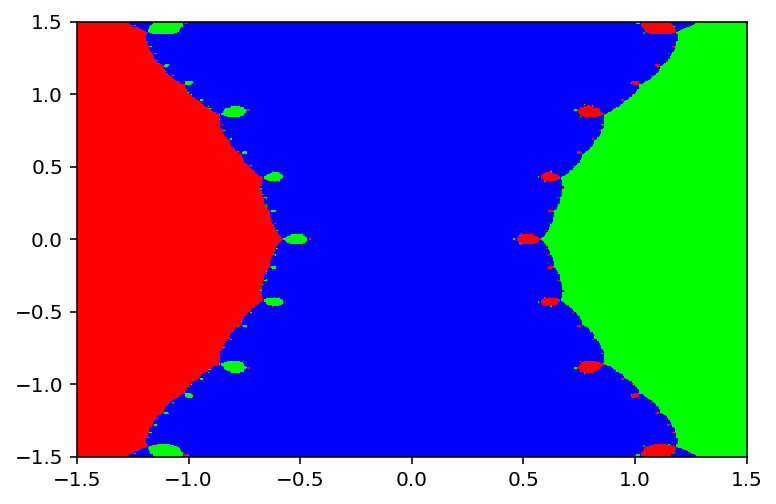

In [24]:
plot_newton_frac(g2,dg2,zeros2,np.array([-1.5,1.5,-1.5,1.5]),500,500)